In [61]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import pandas as pd

df = pd.read_csv('Offensive_Chat_Logs.csv')

tokenizer = AutoTokenizer.from_pretrained("Hate-speech-CNERG/bert-base-uncased-hatexplain")

model = AutoModelForSequenceClassification.from_pretrained("Hate-speech-CNERG/bert-base-uncased-hatexplain")

In [80]:
text_list = ['hello world!', 'hello mars!']

In [81]:
tokens = tokenizer.batch_encode_plus(text_list)
# tokens

In [82]:
inputs = df['Comment']
inputs = inputs.tolist()
# inputs  


In [83]:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

result = classifier(inputs)
result

[{'label': 'normal', 'score': 0.4973295032978058},
 {'label': 'normal', 'score': 0.7732797861099243},
 {'label': 'normal', 'score': 0.6780344843864441},
 {'label': 'normal', 'score': 0.7695605158805847},
 {'label': 'normal', 'score': 0.6783134341239929},
 {'label': 'normal', 'score': 0.7682432532310486},
 {'label': 'normal', 'score': 0.6850053071975708},
 {'label': 'normal', 'score': 0.7515367269515991},
 {'label': 'normal', 'score': 0.697816014289856},
 {'label': 'normal', 'score': 0.7760798931121826},
 {'label': 'normal', 'score': 0.6743921637535095},
 {'label': 'normal', 'score': 0.7389984726905823},
 {'label': 'normal', 'score': 0.7426193952560425},
 {'label': 'normal', 'score': 0.6918816566467285},
 {'label': 'normal', 'score': 0.7896440029144287},
 {'label': 'normal', 'score': 0.7133070230484009},
 {'label': 'normal', 'score': 0.6763118505477905},
 {'label': 'normal', 'score': 0.8141136765480042},
 {'label': 'normal', 'score': 0.7726894617080688},
 {'label': 'normal', 'score': 0.

In [84]:
# Add original comment to result dict
for i in range(inputs.__len__()):
    result[i]['Comment'] = inputs[i]
# result

In [85]:
import csv

header = ['Comment',"label", 'score']

with open('output.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=header)
    writer.writeheader()
    writer.writerows(result)
    

# Comparing our model

In [86]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('Offensive_Chat_Logs.csv')

otherModel = pd.read_csv('output.csv')
y = df['is_offensive']

In [87]:
otherModel

,Comment,label,score
0,The SAME PEOPLE that be calling people hoes be...,normal,0.497330
1,Its been especially bad this year,normal,0.773280
2,"I’m absolutely NOT a conspiracy theorist, but ...",normal,0.678034
3,Does it matter if Steph Curry gets a ring that,normal,0.769561
4,I will bet my house that the league is rigged,normal,0.678313
...,...,...,...
283,"If everybody already hit, Of course a nigga ca...",normal,0.519171
284,chili cheese fries a bad idea for lunch..,normal,0.646757
285,Europe sounds gr8! Will finish my exam on Teus...,normal,0.775179
286,Reflect the light back with a mirror - uno rev...,normal,0.826361


In [88]:
# Take inverse of normal
otherModel.loc[otherModel['label'] == 'normal', 'score'] = 1 - otherModel.loc[otherModel['label'] == 'normal', 'score']
otherModel


,Comment,label,score
0,The SAME PEOPLE that be calling people hoes be...,normal,0.502670
1,Its been especially bad this year,normal,0.226720
2,"I’m absolutely NOT a conspiracy theorist, but ...",normal,0.321966
3,Does it matter if Steph Curry gets a ring that,normal,0.230439
4,I will bet my house that the league is rigged,normal,0.321687
...,...,...,...
283,"If everybody already hit, Of course a nigga ca...",normal,0.480829
284,chili cheese fries a bad idea for lunch..,normal,0.353243
285,Europe sounds gr8! Will finish my exam on Teus...,normal,0.224821
286,Reflect the light back with a mirror - uno rev...,normal,0.173639


In [89]:
#Use scores as prob of offensive
y_pred_prob = otherModel['score']

features = y_pred_prob

# X_train, X_test, y_train, y_test = train_test_split(
# features, y, test_size=.25, random_state=42)
# X_train

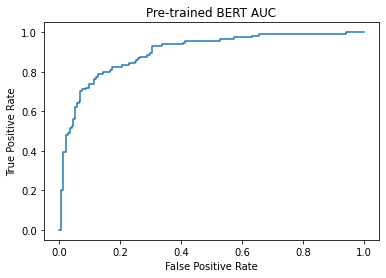

In [91]:
# AUC curve
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('Pre-trained BERT AUC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
# AUC Score
print("Accuracy of Pre-trained BERT model" ,round(metrics.roc_auc_score(y, y_pred_prob) * 100, 2), "%")

Accuracy of Pre-trained BERT model 89.99 %
